# 数据分析-泰坦尼克号
  哪些因素使乘客存活率更高
# 提出问题
  从性别、年龄和乘客等级三个方面进行分析。
    1.性别是否影响存活率
    2.年龄是否影响存活率
    3.乘客等级是否影响存活率
    4.性别和乘客等级共同对存活率的影响
  性别、年龄和乘客等级是自变量，存活率是因变量。
  # 数据字典
  Variable	       Definition	                                         Key
  PassengerId      乘客ID
  Survived         是否幸存          	                         0 = No, 1 = Yes
  Pclass           乘客等级                                      1 = 1st, 2 = 2nd, 3 = 3rd
  Name            乘客姓名
  Sex              乘客性别
  Age 	          乘客年龄	
  SibSp 	       乘客堂兄/妹在船上的人数 	
  Parch 	       乘客父母/孩子在船上的人数	
  Ticket 	       船票号码	
  Fare       	   船票费用
  Cabin 	       房间号 	
  Embarked 	      上船的港口 	                         C = Cherbourg, Q = Queenstown, S = Southampton
  由数据字典可知需要用到的有Survived、Pclass、Sex、Age这几列的数据

# 数据处理

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
#载入数据
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

#查看前几行数据
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
#查看数据的摘要信息
titanic_df.info()
titanic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


  由上述信息中可以看出：
  1.记录集中的平均存活率约为38%，平均年龄约为30岁。
  2.文件中总共有891条记录，其中714条记录年龄非空，即有177条记录里年龄是空的，由于空值记录较多，不宜直接删除，因此可以用平均年龄填充。由于Sex列中数据为'male'或'female'，不方便处理，因此需要相应转化。数据列Survived、Pclass、Age中的数据为数值，无需转化。

In [173]:
#填充年龄为空的数据
titanic_df['Age'].fillna(value=titanic_df['Age'].mean(), inplace=True)
titanic_df.info()

'''
处理性别数据
male 0
female 1
'''
titanic_df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [174]:
#分组统计人数
def group_count(data, name):
    return data.groupby(name)['PassengerId'].count()

#计算每组的存活率
def group_survived_rate(total, survived, name):
    total_count = group_count(total, name)
    survived_count = group_count(survived, name)
    return survived_count/total_count

#绘制饼图
def draw_pie(data, title):
    data.plot(kind='pie', title=title, figsize=(6, 6), autopct='%3.2f%%', startangle=90, legend=True)

#绘制柱状图
def draw_bar(data, title):
    bar = data.plot(kind='bar', title=title)
    for patch in bar.patches:
        bar.annotate('%3.2f%%' % (patch.get_height()*100), (patch.get_x(), patch.get_height()))

# 获取存活者数据
survived_df = titanic_df[titanic_df['Survived'] == 1]
survived_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,0.681287,28.549778,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,0.466660,13.772498,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,0.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,1.000000,29.699118,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,1.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,512.329200


## 性别对存活率的影响

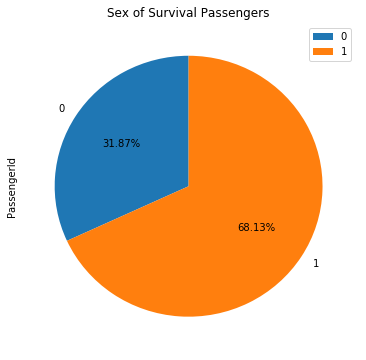

In [175]:
#存活者的性别比例
draw_pie(group_count(survived_df, 'Sex'), 'Sex of Survival Passengers')

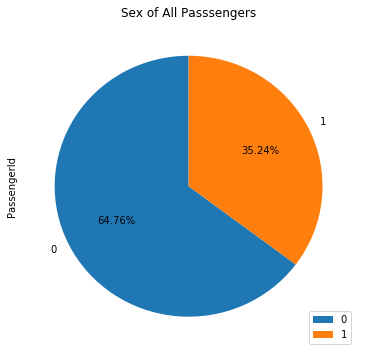

In [176]:
#所有乘客的性别比例
draw_pie(group_count(titanic_df, 'Sex'), 'Sex of All Passsengers')

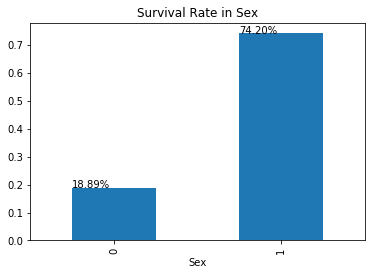

In [189]:
#不同性别乘客的存活率
draw_bar(group_survived_rate(titanic_df, survived_df, 'Sex'),'Survival Rate in Sex')

  全部乘客中男性占64.76%，女性占35.24%；幸存者中女性占68.13%，男性占31.87%。女性存活率达74.20%，而男性存活率只有18.89%。由此可见，女性的存活率更高。

## 年龄对存活率的影响

In [178]:
#全部乘客中年龄的统计信息
titanic_df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [179]:
#存活乘客中年龄的统计信息
survived_df['Age'].describe()

count    342.000000
mean      28.549778
std       13.772498
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

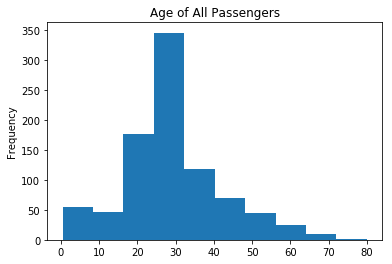

In [180]:
#全部乘客中年龄分布
titanic_df['Age'].plot(kind='hist', title='Age of All Passengers') 

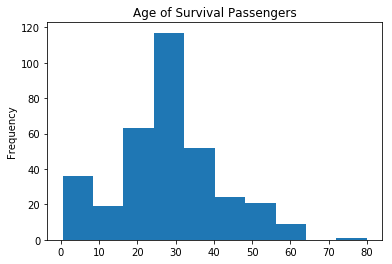

In [181]:
#存活者的年龄分布
survived_df['Age'].plot(kind='hist', title='Age of Survival Passengers')

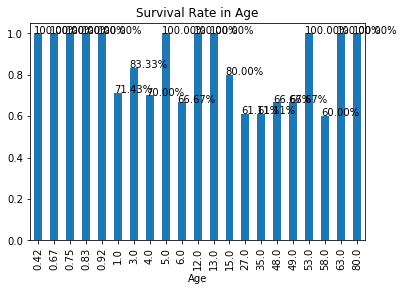

In [182]:
#不同年龄的存活率
group_age_survived_rate = group_survived_rate(titanic_df, survived_df, 'Age')
#存活率超过50%的年龄
group_age_survived_rate = group_age_survived_rate[group_age_survived_rate>0.5]
#存活率超过50%的年龄柱状图
draw_bar(group_age_survived_rate, 'Survival Rate in Age')

  全部乘客年龄的平均值和存活乘客年龄的平均值接近，两者的直方图分布也接近，其中25-30的柱子特别高，这是由于用平均值填充空值记录造成的。从存活率超过50%的柱状图中看，0-6岁、12-15岁、48-53岁这几个年龄段的存活率较高。

## 乘客等级对存活率的影响

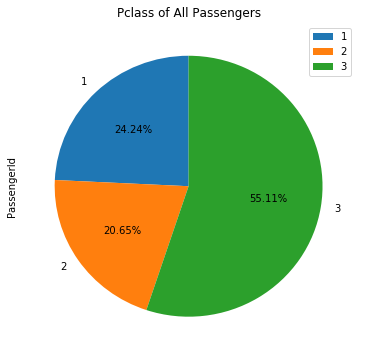

In [183]:
#全部乘客的等级比例
draw_pie(group_count(titanic_df, 'Pclass'), 'Pclass of All Passengers')

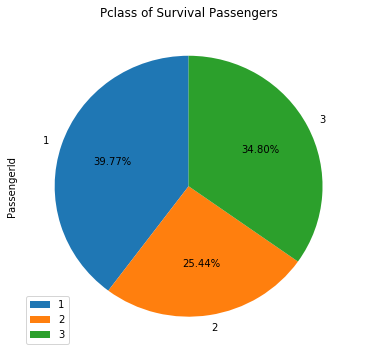

In [184]:
#存活乘客的等级比例
draw_pie(group_count(survived_df, 'Pclass'), 'Pclass of Survival Passengers')

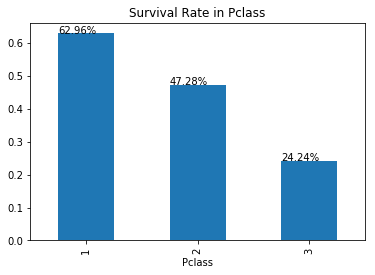

In [185]:
#不同等级乘客的存活率
draw_bar(group_survived_rate(titanic_df, survived_df, 'Pclass'),'Survival Rate in Pclass')

  全部乘客中等级1的占24.24%，等级2的占20.65%，等级3的占55.11%；幸存者中等级1的占39.77%，等级2的占25.44%，等级3的占34.80%。等级1的存活率达62.96%，等级2的存活率有47.28%，而等级3的只有24.24%。由此可见，等级1的存活率最高，等级3的存活率最低。

## 性别和乘客等级共同对存活率的影响

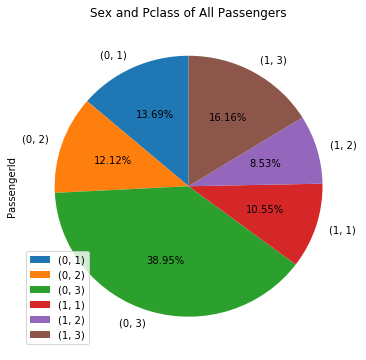

In [186]:
#全部乘客中不同性别和乘客等级比例
draw_pie(group_count(titanic_df, ('Sex', 'Pclass')), 'Sex and Pclass of All Passengers')

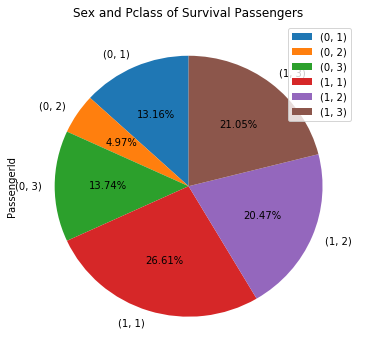

In [187]:
#存活乘客中不同性别和乘客等级比例
draw_pie(group_count(survived_df, ('Sex', 'Pclass')), 'Sex and Pclass of Survival Passengers')

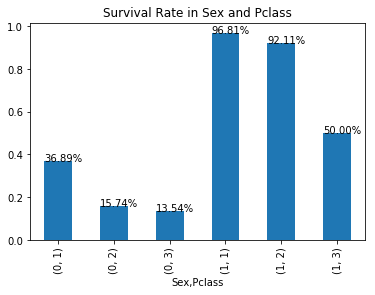

In [188]:
#不同性别和乘客等级的存活率
draw_bar(group_survived_rate(titanic_df, survived_df, ('Sex', 'Pclass')), 'Survival Rate in Sex and Pclass')

  在全部乘客中等级3的男性比例最高，占38.95%；其次是的等级3的女性乘客，占16.16%；等级2的女性比例最低，占8.53%。在存活乘客中不同等级的女性存活率都比较高，等级1的女性比例最高，占26.61%；不同等级的男性存活率都比较低，等级2的男性最低，只有4.97%。由柱状图中可知，女性的存活率都比较高，且明显比男性的都高；男性中等级1的比较高，等级3的最低。
  由此可见，性别是影响存活率最大因素，女性比男性更易存活。其次是乘客等级，等级1的存活率最高，等级2的其次，等级3的最低。

# 局限性
  这里没有用统计学的方法去分析得出这些结果的偶然性，这就无法知道这些结果是由真实的差异造成的还是由噪音造成的。由于年龄子段存在空值，用平均年龄替换后，这会影响年龄的差异，从而影响分析结果。此外，还有一些影响存活率的因素如身体素质、求生意志、教育程度等数据未给出，因此无法完全进行准确的分析。
# 结论
  性别、年龄和乘客等级均会影响存活率，它们之间存在相关性。但由于这些数据不是在试验中得出，自变量和因变量之间的因果性不确定。